<a href="https://colab.research.google.com/github/manikur/R-programming/blob/gh-pages/Price_NSEI%26VIXS%26P500_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price NSEI Analysis with Python

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=1e4df51a3fa09f968cf7ecd03db435a8492cbbc79821d84db4f26f4117594292
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
nsei = yf.download('^NSEI',
 start='2020-01-01',
 end='2021-08-31',
 progress=False)

In [4]:
nsei.tail(9)

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2021-08-17  16545.250000  16628.550781  ...  16614.599609  297400
2021-08-18  16691.949219  16701.849609  ...  16568.849609  251800
2021-08-20  16382.500000  16509.550781  ...  16450.500000  350800
2021-08-23  16592.250000  16592.500000  ...  16496.449219  275600
2021-08-24  16561.400391  16647.099609  ...  16624.599609  275400
2021-08-25  16654.000000  16712.449219  ...  16634.650391  265900
2021-08-26  16627.949219  16683.699219  ...  16636.900391  253500
2021-08-27  16642.550781  16722.050781  ...  16705.199219  217400
2021-08-30  16775.849609  16951.500000  ...  16931.050781  283500

[9 rows x 6 columns]

In [5]:
nsei.head()

Open          High  ...     Adj Close  Volume
Date                                    ...                      
2020-01-01  12202.150391  12222.200195  ...  12182.500000  304100
2020-01-02  12198.549805  12289.900391  ...  12282.200195  407700
2020-01-03  12261.099609  12265.599609  ...  12226.650391  428800
2020-01-06  12170.599609  12179.099609  ...  11993.049805  396500
2020-01-07  12079.099609  12152.150391  ...  12052.950195  447800

[5 rows x 6 columns]

In [6]:
import matplotlib.pyplot as plt

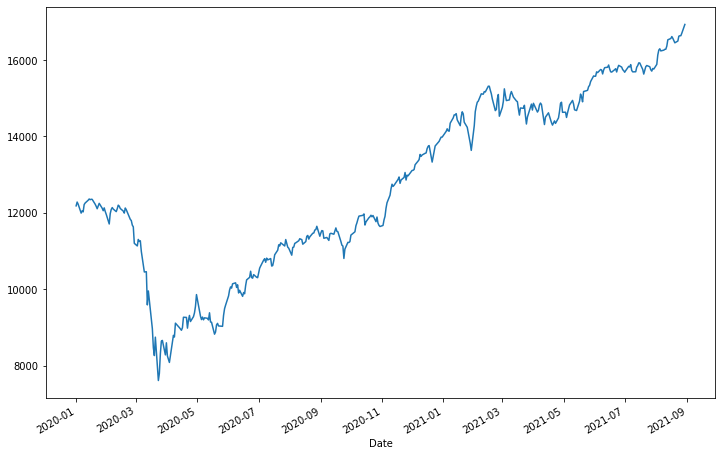

In [7]:
nsei['Close'].plot(figsize=(12,8))

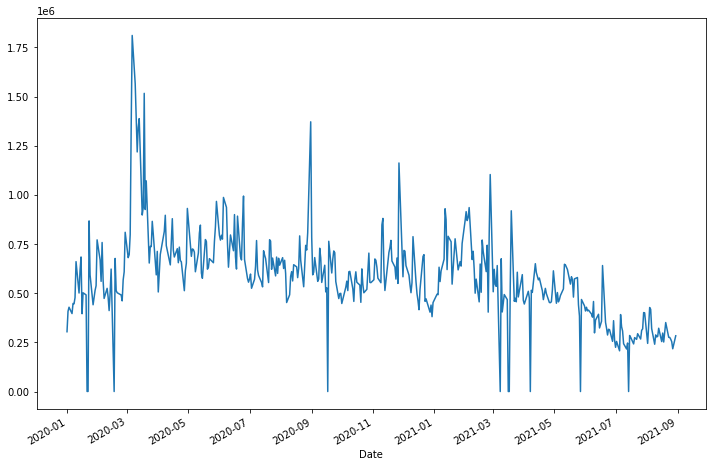

In [8]:
nsei['Volume'].plot(figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ad3e76f10>,
      dtype=object)

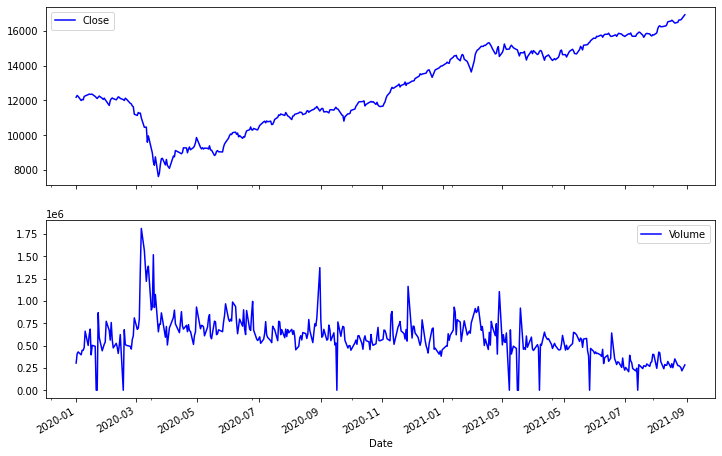

In [9]:
nsei[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8))

In [10]:
nsei.describe()

Open          High  ...     Adj Close        Volume
count    412.000000    412.000000  ...    412.000000  4.120000e+02
mean   12764.942467  12842.214422  ...  12753.068321  5.821235e+05
std     2311.876947   2293.643342  ...   2315.367523  2.282755e+05
min     7735.149902   8036.950195  ...   7610.250000  0.000000e+00
25%    11209.824951  11252.549805  ...  11174.362793  4.589250e+05
50%    12240.324707  12285.150391  ...  12252.524902  5.770000e+05
75%    14842.150146  14918.700195  ...  14854.199951  6.858750e+05
max    16775.849609  16951.500000  ...  16931.050781  1.811000e+06

[8 rows x 6 columns]

In [11]:
nsei['simple_rtn'] = nsei.Close.pct_change()

In [12]:
nsei['log_rtn'] = np.log(nsei.Close/nsei.Close.shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ad2cbf490>],
      dtype=object)

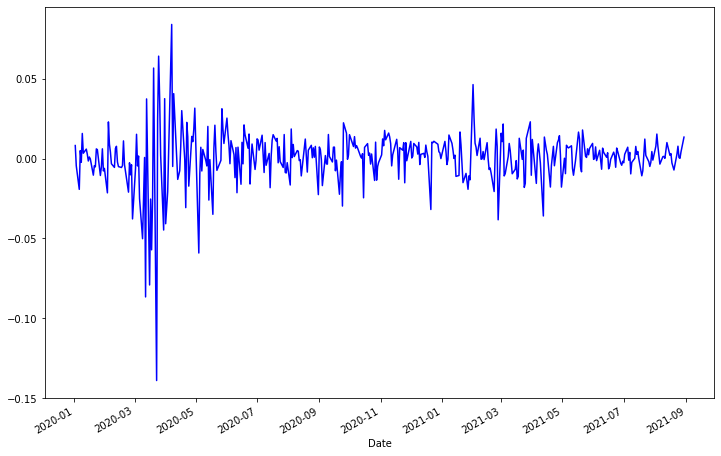

In [13]:
nsei['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [14]:
nsei['log_rtn'].tail(12)

Date
2021-08-12    0.005033
2021-08-13    0.010014
2021-08-16    0.002052
2021-08-17    0.003107
2021-08-18   -0.002757
2021-08-20   -0.007169
2021-08-23    0.002789
2021-08-24    0.007738
2021-08-25    0.000604
2021-08-26    0.000135
2021-08-27    0.004097
2021-08-30    0.013429
Name: log_rtn, dtype: float64

In [15]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [16]:
init_notebook_mode()

In [17]:
df_rolling = nsei[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])

In [18]:
df_rolling.columns = df_rolling.columns.droplevel()

In [19]:
df_outliers = nsei.join(df_rolling)

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [25]:
df = yf.download(['^NSEI', '^VIX'],
start='1985-01-01',
end='2021-08-30',
progress=False)

In [26]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^NSEI': 'nsei', '^VIX': 'vix'})

In [27]:
df.tail()

nsei        vix
Date                               
2021-08-23  16496.449219  17.150000
2021-08-24  16624.599609  17.219999
2021-08-25  16634.650391  16.790001
2021-08-26  16636.900391  18.840000
2021-08-27  16705.199219  16.389999

In [28]:
df['log_rtn'] = np.log(df.nsei / df.nsei.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [29]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'NSEI log returns'),
 Text(0.5, 1.0, 'NSEI vs. VIX ($\\rho$ = -0.21)')]

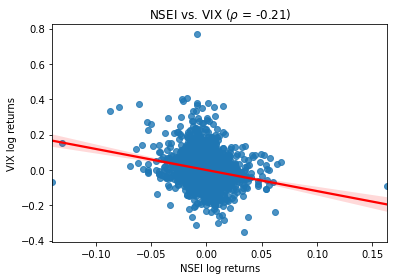

In [31]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'NSEI vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='NSEI log returns')

In [32]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

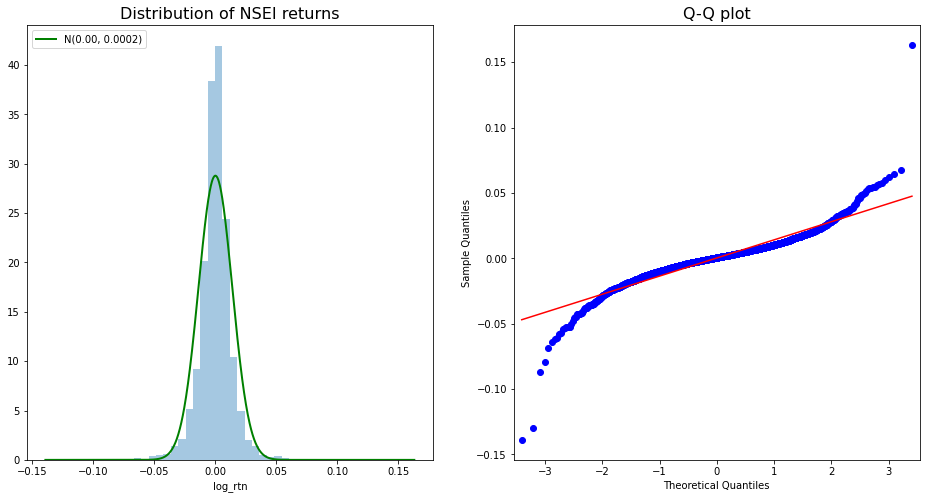

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of NSEI returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [34]:
df['log_rtn'].tail()

Date
2021-08-23    0.002789
2021-08-24    0.007738
2021-08-25    0.000604
2021-08-26    0.000135
2021-08-27    0.004097
Name: log_rtn, dtype: float64

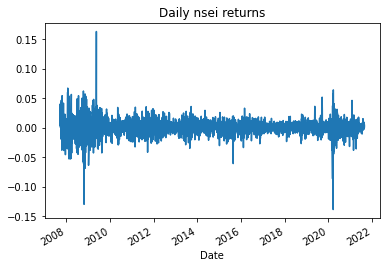

In [35]:
df.log_rtn.plot(title='Daily nsei returns')

In [36]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

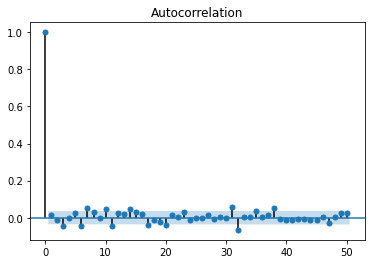

In [37]:
acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

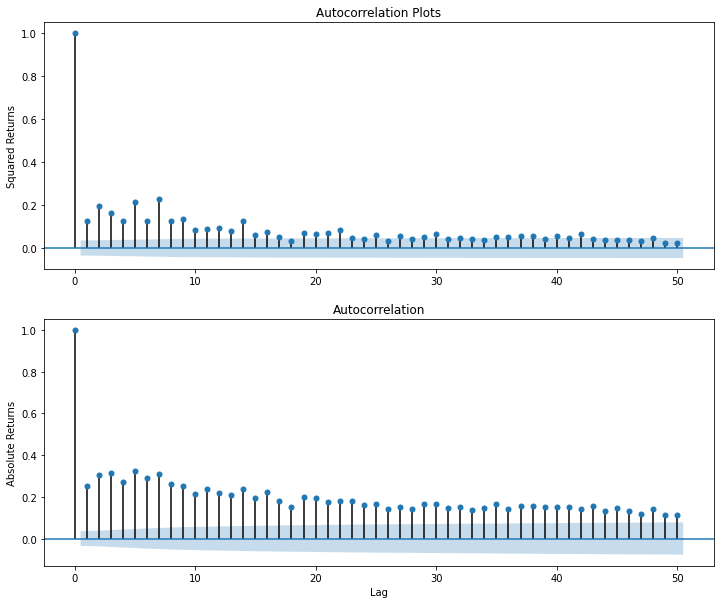

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [39]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

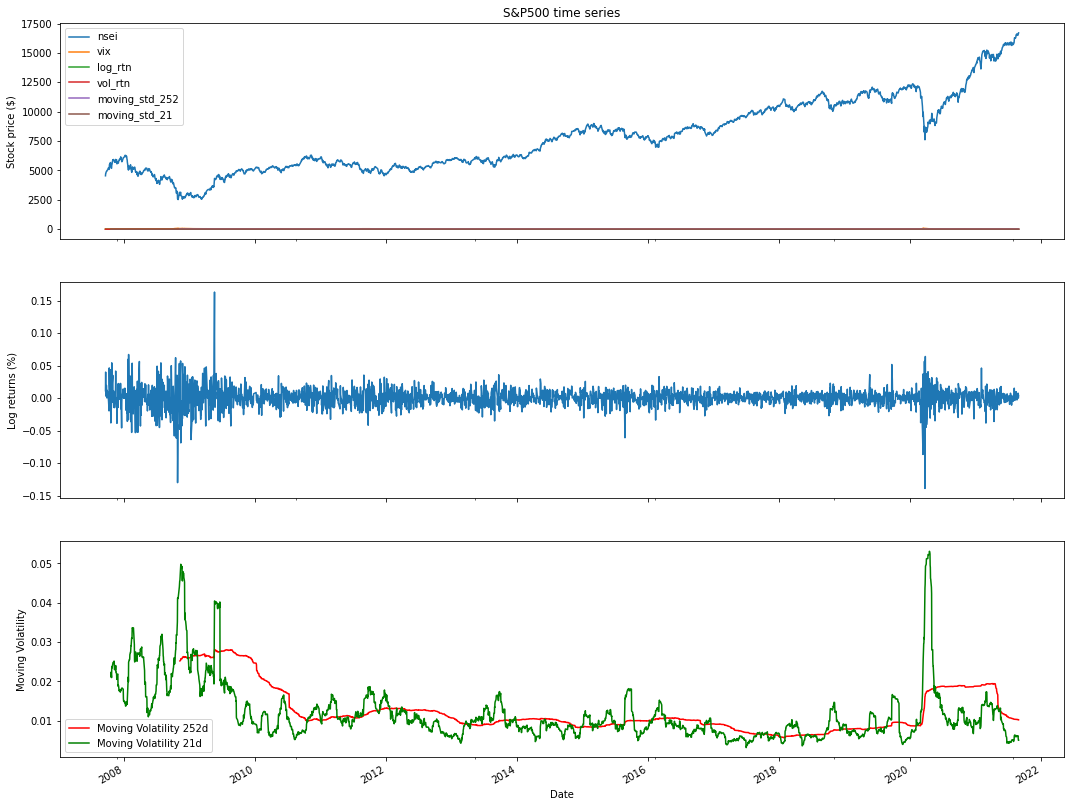

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='S&P500 time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

**Price S&P500 Analysis with Python**

In [41]:
df = yf.download(['^GSPC', '^VIX'],
start='1985-01-01',
end='2021-08-30',
progress=False)

In [42]:
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

In [43]:
df.tail()

sp500        vix
Date                              
2021-08-23  4479.529785  17.150000
2021-08-24  4486.229980  17.219999
2021-08-25  4496.189941  16.790001
2021-08-26  4470.000000  18.840000
2021-08-27  4509.370117  16.389999

In [44]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [45]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

[Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns'),
 Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)')]

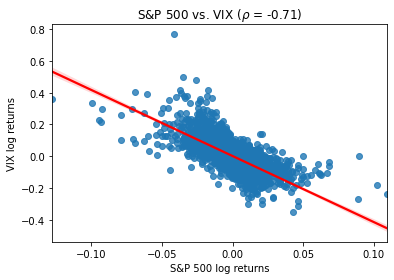

In [46]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
ylabel='VIX log returns',
xlabel='S&P 500 log returns')

In [47]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Q-Q plot')

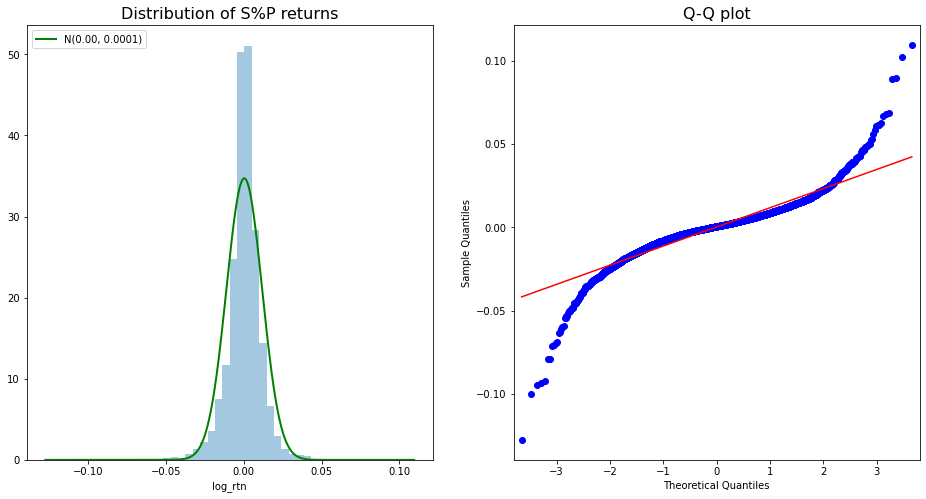

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of S%P returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [49]:
df['log_rtn'].tail()

Date
2021-08-23    0.008488
2021-08-24    0.001495
2021-08-25    0.002218
2021-08-26   -0.005842
2021-08-27    0.008769
Name: log_rtn, dtype: float64

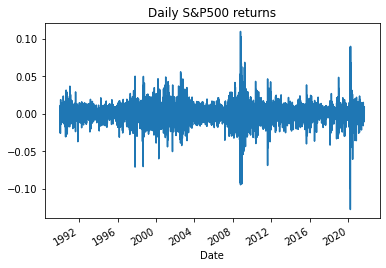

In [50]:
df.log_rtn.plot(title='Daily S&P500 returns')

In [51]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

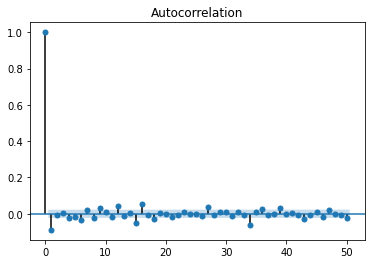

In [52]:

acf = smt.graphics.plot_acf(df.log_rtn,
lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL
)

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

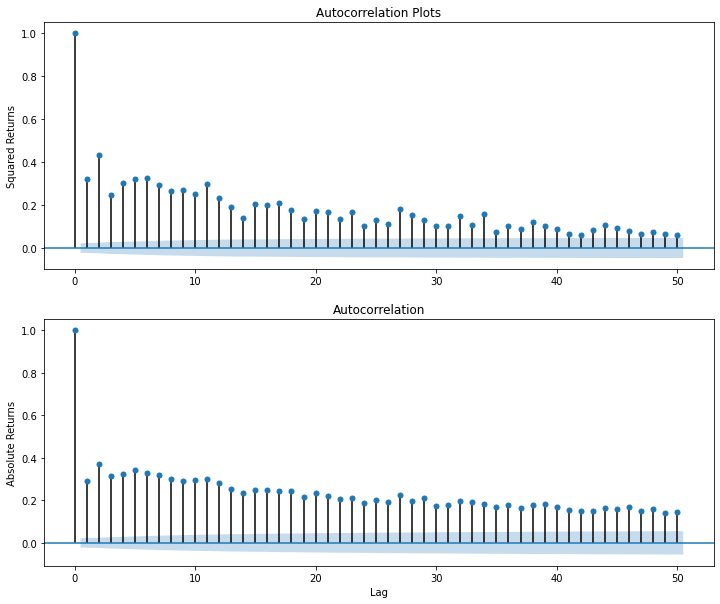

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
ylabel='Squared Returns')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
xlabel='Lag')

In [54]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

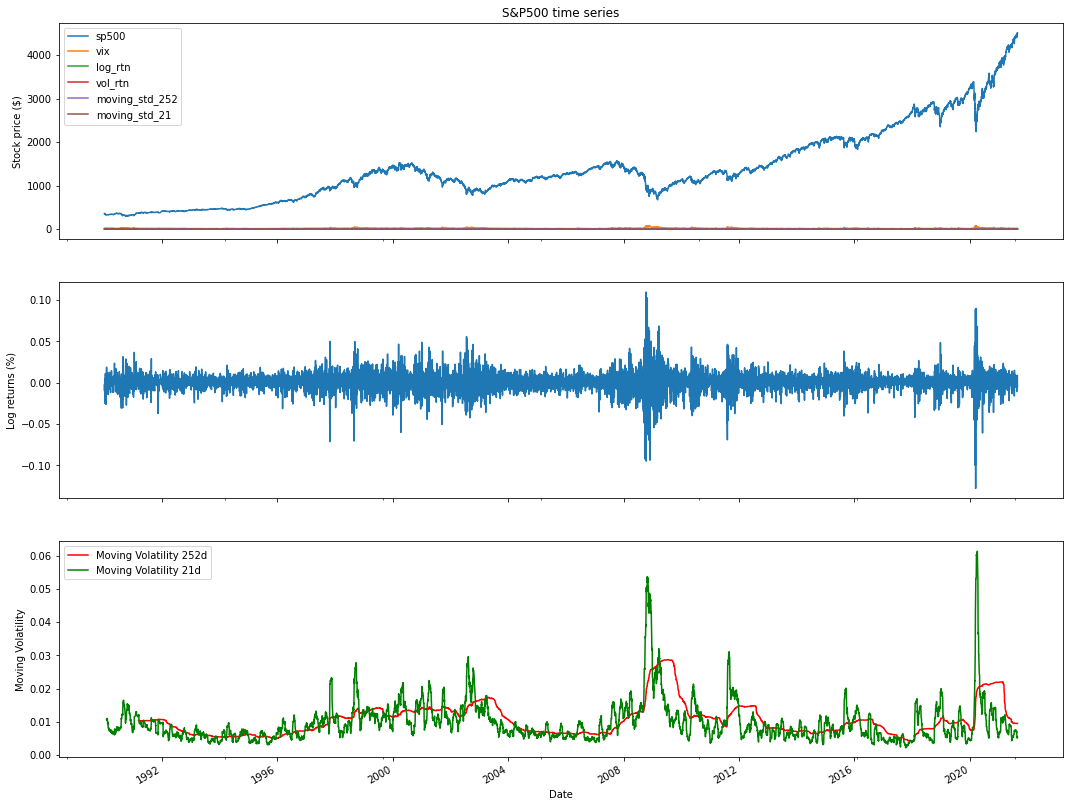

In [55]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
df.plot(ax=ax[0])
ax[0].set(title='S&P500 time series',
ylabel='Stock price ($)')
df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
df.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()